In [1]:
import tensorflow as tf

In [2]:
# By yhe way, what is a server / service / API?

# Best way to learn is by example
# Here is a service that simply returns your IP address in a JSON

import requests
r = requests.get("https://api.ipify.org?format=json")
j = r.json()
print(j)

# Our Tensorflow model server is the same, except what it does is much more
# complex - it returns the predictions from a ML model!


{'ip': '34.87.3.54'}


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import subprocess

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:",x_train.shape)
print("x_test.shape:",x_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)


In [5]:
# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print("x_train.shape:",x_train.shape)
print("x_test.shape:",x_test.shape)

x_train.shape: (60000, 28, 28, 1)
x_test.shape: (10000, 28, 28, 1)


In [6]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [7]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 13, 13, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 6, 6, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 360,458 (1.38 MB)

 Trainable params: 360,458 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.7404 - loss: 0.7043 - val_accuracy: 0.8529 - val_loss: 0.3988
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8592 - loss: 0.3742 - val_accuracy: 0.8631 - val_loss: 0.3739
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8791 - loss: 0.3186 - val_accuracy: 0.8865 - val_loss: 0.3105
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8931 - loss: 0.2804 - val_accuracy: 0.8855 - val_loss: 0.3251
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9038 - loss: 0.2521 - val_accuracy: 0.8905 - val_loss: 0.2980
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9149 - loss: 0.2300 - val_accuracy: 0.8949 - val_loss: 0.2872
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9208 - loss: 0.2082 - val_accuracy: 0.8968 - val_loss: 0.2902
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9254 - loss: 0.1937

In [9]:
# Save the model to a temporary directory
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))
if os.path.isdir(export_path):
  print('\nAlready saved a model, cleaning up\n')
  !rm -r {export_path}

tf.saved_model.save(model, export_path)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/1


Saved model:
total 120
drwxr-xr-x 2 root root   4096 Mar  3 12:28 assets
-rw-r--r-- 1 root root     58 Mar  3 12:28 fingerprint.pb
-rw-r--r-- 1 root root 107069 Mar  3 12:28 saved_model.pb
drwxr-xr-x 2 root root   4096 Mar  3 12:28 variables


In [10]:
!saved_model_cli show --dir {export_path} --all

2025-03-03 12:30:40.795023: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741005040.852196    2595 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741005040.872895    2595 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The 

In [12]:
# This is the same as you would do from your command line, but without the [arch=amd64], and n...
# You would instead do:
# echo "deb [aech=amd64] http//storage.googleapis.com/tensorflow-serving-apt stable tensorflow ..."
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg...

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" > /etc/apt/sources.list.d/tensorflow-serving.list
!curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg
!apt update

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [68.9 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,664 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,321 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,235 kB]
Hit:10 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:11 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,026 B]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 htt

In [13]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package tensorflow-model-server


In [14]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [15]:
%%bash --bg
nohup tensorflow_model_server \
--rest_api_port=8501 \
--model_name=fashion_model \
--model_base_path="${MODEL_DIR}" >server.log 2>&1

In [16]:
!tail server.log

nohup: failed to run command 'tensorflow_model_server': No such file or directory


In [17]:
# Labl mapping
labels = ''' T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

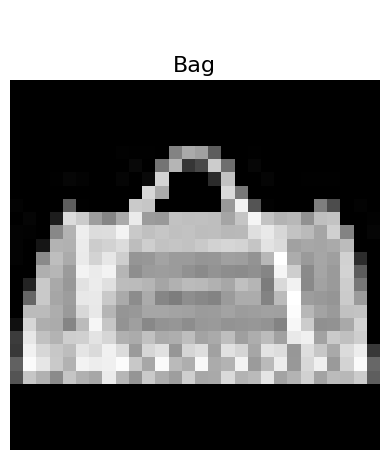

In [24]:
def show(idx,title):
  plt.figure()
  plt.imshow(x_test[idx].reshape(28,28),cmap='gray')
  plt.axis('off')
  plt.title('\n\n{}'.format(title),fontdict={'size':16})

i = np.random.randint(0,len(x_test))
show(i,labels[y_test[i]])

In [25]:
# Format some data to pass to the server
#{
#  "signature_name": "serving_default"
#  "instances": [an N x H x W x C list ],
#}

import json
data = json.dumps({"signature_name":"serving_default","instances":x_test[0:3].tolist()})
print(data)



{"signature_name": "serving_default", "instances": [[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], 

In [ ]:
headers = {"content-type":"application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model:predict',data=data,headers=headers)
j = r.json()
print(j.keys())
print(j)

In [ ]:
# It looks like a 2-D array, let's check its shape
pred = np.array(j['predictions'])
print(pred.shape)

# This is the N x K output array from the model
# pred[n,k] is the probability that we believe the nth sample belongs to the kth class

In [ ]:
# Get the predicted classes
pred = pred.argmax(axis=1)

In [ ]:
# Map them back to strings
pred = [label[i] for i in pred]
print(pred)

In [ ]:
# Get the true labels
actual = [labels[i] for i in y_test[0:3]]
print(actual)

In [ ]:
for i in range(0,3):
  show(i,f"True:{actual[i]},Predicted:{pred[i]}")

In [ ]:
# Allows you to select a model by version

headers = {"content-type":"application/json"}
r = requests.post('http://localhost:8501/v1/models/fashion_model',data = data)
j = r.json()
pred = np.array(j['predictions'])
pred = pred.argmax(axis=1)
pred = [labels[i] for i in pred]
for i in range(0,3):
  show(i,f"True:{actual[i]},Predicted:{pred[i]}")

In [29]:
# Let's male a new model version
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Flatten()(x)
x = Dense(K, activation='softmax')(x)

model2 = Model(i, x)
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          54,090 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,410 (212.54 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compile and fit
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Corrected the typo in the loss function name
              metrics=['accuracy'])
r = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7799 - loss: 0.6333 - val_accuracy: 0.8548 - val_loss: 0.4069
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8764 - loss: 0.3521 - val_accuracy: 0.8763 - val_loss: 0.3541
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8879 - loss: 0.3082 - val_accuracy: 0.8820 - val_loss: 0.3307
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9001 - loss: 0.2788 - val_accuracy: 0.8810 - val_loss: 0.3300
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9058 - loss: 0.2575 - val_accuracy: 0.8864 - val_loss: 0.3181
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9150 - loss: 0.2401 - val_accuracy: 0.8912 - val_loss: 0.3078
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9195 - loss: 0.2266 - val_accuracy: 0.8931 - val_loss: 0.3072
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9214 - loss: 0.2204 - 

In [33]:
# Save version 2 of the model

version = 2
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))
if os.path.isdir(export_path):
  print('\nAlready saved a model, cleaning up\n')
  !rm -r {export_path}

tf.saved_model.save(model2, export_path)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/2


Saved model:
total 64
drwxr-xr-x 2 root root  4096 Mar  3 13:14 assets
-rw-r--r-- 1 root root    59 Mar  3 13:14 fingerprint.pb
-rw-r--r-- 1 root root 52411 Mar  3 13:14 saved_model.pb
drwxr-xr-x 2 root root  4096 Mar  3 13:14 variables


In [ ]:
# Will Tensorflow serving know about the new model without restarting?
headers = {"content-type":"application/json"}
r = requests.post('http://localhost:8501/v1/models/fashion_model/versions/2:predict',data = data)
j = r.json()
pred = np.array(j['predictions'])
pred = pred.argmax(axis=1)
pred = [labels[i] for i in pred]
for i in range(0,3):
  show(i,f"True:{actual[i]},Predicted:{pred[i]}")

In [ ]:
# What it we use a version number that does not exist?
headers = {"content-type":"application/json"}
r = requests.post('http://localhost:8501/v1/models/fashion_model/versions/3:predict',data = data)
j = r.json()
print(j)